# World Happiness Report 2023 Analysis

## Introduction
The World Happiness Report is an annual global landmark survey published since 2012. The aim of the World Happiness Report is to help goverments making social-policy decisions.<br><br>
The happiness score is expressed as ladder score. Imagine that the standard of your life is a ladder step. The 0 step is the wors possible life you can imagine and the 10th step is the best possible life you can imagine. The question was: what level are you at?<br><br>
The ladder score is juxtaposed wit socio-economic factors such as GDP per capita, social support, healthy life expectancy,
freedom to make life choices, generosity and corruption.

## Analysis
We'll use two datasets available at Kaggle.com:<br>
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023<br>
https://www.kaggle.com/datasets/petersorensen360/iso3166countrieswithregionalcodes<br><br>
We'll perform this analysis in Python, using Pandas, Seaborn, Plotly express and Scipy packages and librries.<br><br>
To start the analysis we have to import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from scipy import stats

Next we have to import data:

In [2]:
#importing data
df = pd.read_csv('https://raw.githubusercontent.com/MagdalenaPraselek/WorldHappiness2023EDA/main/WHR2023.csv')
mapping_df = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

Let's look at our data frames and stats:

In [3]:
#Displaying data frame info and descriptive stats
df.info()
df.describe()

mapping_df.info()
mapping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

,country-code,region-code,sub-region-code,intermediate-region-code
count,249.000000,248.000000,248.000000,107.000000
mean,433.835341,65.951613,179.866935,31.719626
std,252.980446,67.347832,138.334170,111.000322
min,4.000000,2.000000,15.000000,5.000000
25%,218.000000,9.000000,53.750000,11.000000
50%,434.000000,19.000000,154.000000,14.000000
75%,652.000000,142.000000,202.000000,29.000000
max,894.000000,150.000000,419.000000,830.000000


Let's standarize column names. That will make our work easier.

In [4]:
#standarizing column names
df.columns = df.columns.str.replace(' ', '_').str.lower()
mapping_df.columns = mapping_df.columns.str.replace(' ', '_').str.replace('-', '_').str.lower()

Next let's remove unnecessary columns. Beacuse we need only small amount of the column for this analysis, we'll do it by leaving only necessary columns.

In [5]:
df = df[['country_name', 'ladder_score', 'logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'ladder_score_in_dystopia']].copy()
mapping_df = mapping_df[['name', 'alpha_3', 'region', 'sub_region']].copy()

Let's display 10 first rows of each data frame:

In [6]:
df.head(10)

,country_name,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778
5,Sweden,7.395,10.883,0.939,72.150,0.948,0.165,0.202,1.778
6,Norway,7.315,11.088,0.943,71.500,0.947,0.141,0.283,1.778
7,Switzerland,7.240,11.164,0.920,72.900,0.891,0.027,0.266,1.778
8,Luxembourg,7.228,11.660,0.879,71.675,0.915,0.024,0.345,1.778
9,New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271,1.778


In [7]:
mapping_df.head(10)

,name,alpha_3,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia
5,Andorra,AND,Europe,Southern Europe
6,Angola,AGO,Africa,Sub-Saharan Africa
7,Anguilla,AIA,Americas,Latin America and the Caribbean
8,Antarctica,ATA,NaN,NaN
9,Antigua and Barbuda,ATG,Americas,Latin America and the Caribbean


Next we have to merge the dataframes to easily analize the data.
As the country names in some rows have differences between the two datasets, we have to standarize them.

In [8]:
#preparing to merge
mapping_df.rename(columns = {'name': 'country_name'}, inplace = True)
df.iloc[14, 0] = 'United States of America'
df.iloc[18, 0] = 'United Kingdom of Great Britain and Northern Ireland'
df.iloc[26, 0] = 'Taiwan, Province of China'
df.iloc[56, 0] = 'Korea, Republic of'
df.iloc[62, 0] = 'Moldova, Republic of'
df.iloc[64, 0] = 'Viet Nam'
df.iloc[68, 0] = 'Bolivia (Plurinational State of)'
df.iloc[69, 0] = 'Russian Federation'
df.iloc[81, 0] = 'Hong Kong'
df.iloc[85, 0] = 'Congo'
df.iloc[87, 0] = 'Venezuela (Bolivarian Republic of)'
df.iloc[88, 0] = "Lao People's Democratic Republic"
df.iloc[92, 0] = "Côte d'Ivoire"
df.iloc[98, 0] = 'Palestine, State of'
df.iloc[100, 0] = 'Iran (Islamic Republic of)'
df.iloc[105, 0] = 'Turkey'
df.iloc[128, 0] = 'Tanzania, United Republic of'
df.iloc[132, 0] = 'Congo, Democratic Republic of the'



In [9]:
#merging dataframes
df = pd.merge(df, mapping_df,  on = 'country_name', how = 'left')

Let's see how the merged dataframe look like:

In [10]:
df.head()

,country_name,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,alpha_3,region,sub_region
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,FIN,Europe,Northern Europe
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778,DNK,Europe,Northern Europe
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778,ISL,Europe,Northern Europe
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,ISR,Asia,Western Asia
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778,NLD,Europe,Western Europe


Next let's display merged df info.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_name                  137 non-null    object 
 1   ladder_score                  137 non-null    float64
 2   logged_gdp_per_capita         137 non-null    float64
 3   social_support                137 non-null    float64
 4   healthy_life_expectancy       136 non-null    float64
 5   freedom_to_make_life_choices  137 non-null    float64
 6   generosity                    137 non-null    float64
 7   perceptions_of_corruption     137 non-null    float64
 8   ladder_score_in_dystopia      137 non-null    float64
 9   alpha_3                       136 non-null    object 
 10  region                        136 non-null    object 
 11  sub_region                    136 non-null    object 
dtypes: float64(8), object(4)
memory usage: 13.0+ KB


Let's see the data about Poland:

In [12]:
df[df['country_name'] == 'Poland']

,country_name,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,alpha_3,region,sub_region
38,Poland,6.26,10.453,0.925,69.049,0.765,-0.031,0.736,1.778,POL,Europe,Eastern Europe


As we saw in df info, we have some null values.

In [37]:
df.isnull().sum()

country_name                    0
ladder_score                    0
logged_gdp_per_capita           0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
ladder_score_in_dystopia        0
alpha_3                         1
region                          0
sub_region                      0
dtype: int64

In [13]:
df[df['healthy_life_expectancy'].isnull() | df['region'].isnull() | df['sub_region'].isnull()]

,country_name,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,alpha_3,region,sub_region
33,Kosovo,6.368,9.359,0.844,65.195,0.861,0.259,0.866,1.778,NaN,NaN,NaN
98,"Palestine, State of",4.908,8.716,0.859,NaN,0.694,-0.132,0.836,1.778,PSE,Asia,Western Asia


We can complete some of the values:

In [16]:
df.iloc[33, -1] = 'Southern Europe'
df.iloc[33, -2] = 'Europe'

Now we'll perform some computations so that we easily draw plots.

In [17]:
#computations
df_top_10 = df.nlargest(10, 'ladder_score')
df_low_10 = df.nsmallest(10, 'ladder_score')

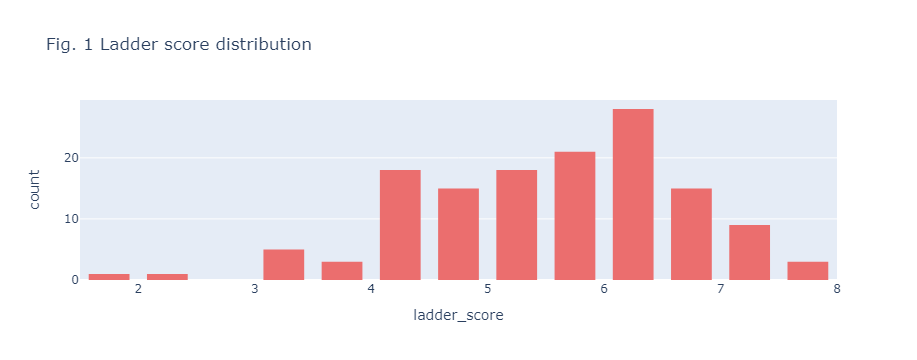

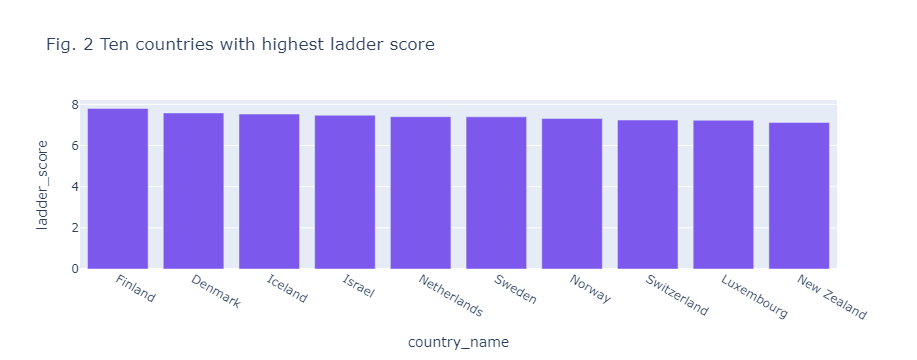

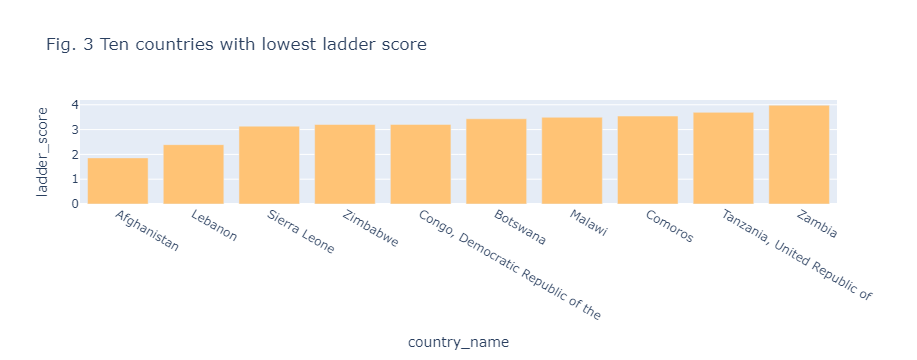

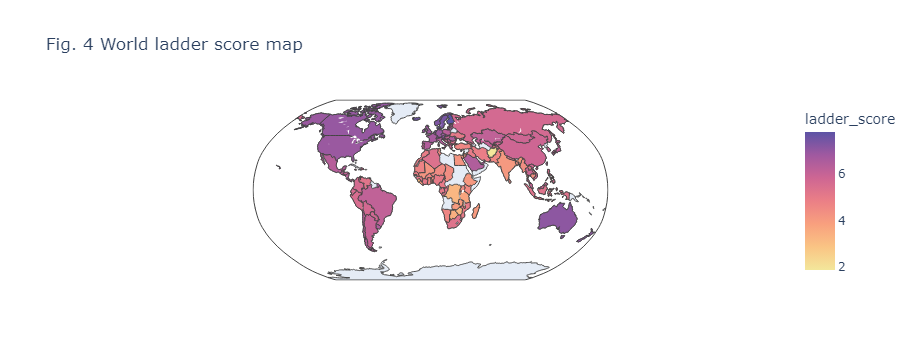

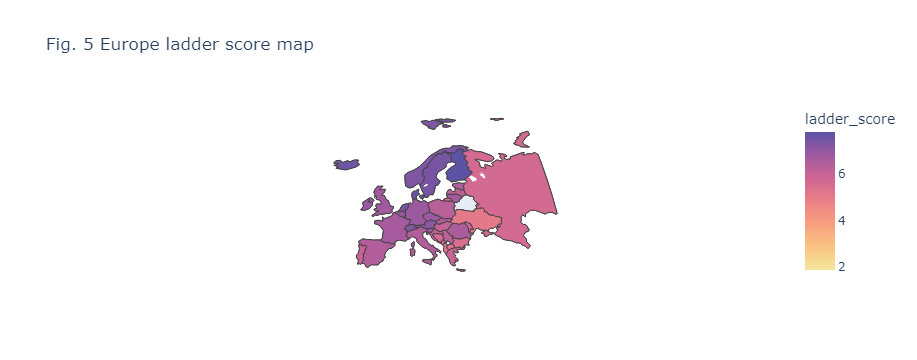

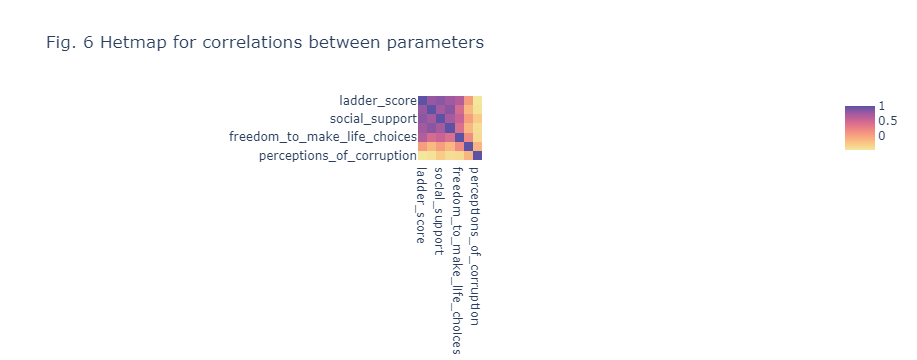

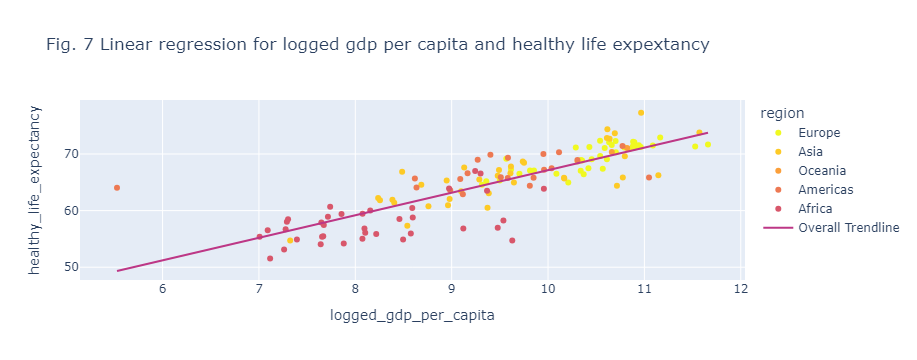

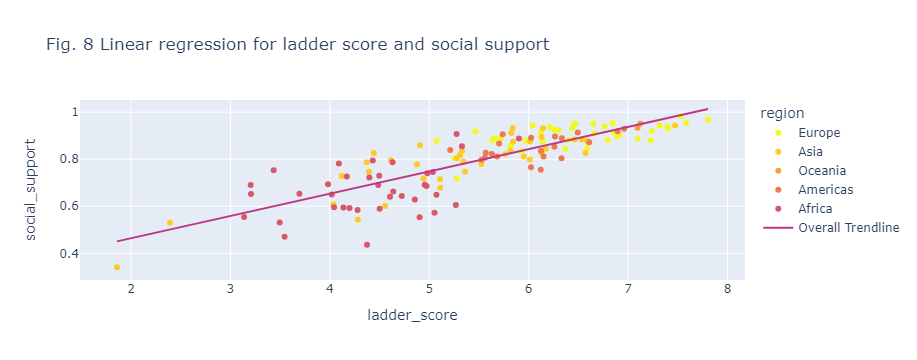

In [36]:
#plots
sns.set()

fig1 = px.histogram(df, 
                    x = 'ladder_score', 
                    title = 'Fig. 1 Ladder score distribution')
fig1.update_traces(marker_color = '#eb6e6e')
fig1.update_layout(bargap = 0.3)
fig1.show()

fig2 = px.bar(df_top_10,
              x = 'country_name',
              y = 'ladder_score',
              title = 'Fig. 2 Ten countries with highest ladder score')
fig2.update_traces(marker_color = '#7d58ed')
fig2.show()

fig3 = px.bar(df_low_10,
              x = 'country_name',
              y = 'ladder_score',
              title = 'Fig. 3 Ten countries with lowest ladder score')
fig3.update_traces(marker_color = '#ffc375')

fig3.show()

fig4 = px.choropleth(data_frame=df, 
                    locations='alpha_3',
                    locationmode='ISO-3',
                    color='ladder_score',
                    color_continuous_scale='sunset',
                    projection = 'robinson',
                    title = 'Fig. 4 World ladder score map')

fig4.show()


fig5 = px.choropleth(data_frame=df, 
                    locations='alpha_3',
                    locationmode='ISO-3',
                    color='ladder_score',
                    color_continuous_scale='sunset',
                    scope = 'europe',
                    projection = 'robinson',
                    title ='Fig. 5 Europe ladder score map')

fig5.show()


fig6 = px.imshow(df[['ladder_score', 'logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']].corr(),
                 color_continuous_scale='sunset',
                 title = 'Fig. 6 Hetmap for correlations between parameters')
fig6.show()

fig7 = px.scatter(df,
                  x = 'logged_gdp_per_capita',
                  y = 'healthy_life_expectancy',
                  trendline = 'ols',
                  trendline_scope = 'overall',
                  color = 'region',
                  color_discrete_sequence = px.colors.sequential.Plasma_r,
                  title = 'Fig. 7 Linear regression for logged gdp per capita and healthy life expextancy')
fig7.show()

fig8 = px.scatter(df,
                  x = 'ladder_score',
                  y = 'social_support',
                  trendline = 'ols',
                  trendline_scope = 'overall',
                  color = 'region',
                  color_discrete_sequence = px.colors.sequential.Plasma_r, title = 'Fig. 8 Linear regression for ladder score and social support')
fig8.show()


Testing statistical hypotheses

Let's look at the strongest correlations from Fig. 6. As we can see, the darkest color is for below pair of parameters:
healthy life expectancy, logged gdp per capita and social support , ladder score.

As we checked earlies, we have a nan value in healthy life expectancy column. This record belongs to Palestine. W have to drop this record so that we can perform tests.

In [23]:
#Dropping the null value
df_stat = df_stat.dropna()

Next we have to check if out data have normal distribution by performing statistical hypothesis testing:<br>
Zero hypothesis: there is normal distribution<br>
Alternative hypothesis: there is no normal distribution<br><br>
The significance level: alpha = 0.05 which means that we will be 95% sure that the result is realiable.<br><br>

To test the hypoteses we'll use Saphiro-Wilk test:

In [24]:
r, p = stats.shapiro(df_stat['healthy_life_expectancy'])
r, p 

(0.9568194150924683, 0.0002781942312140018)

In [25]:
r, p = stats.shapiro(df_stat['logged_gdp_per_capita'])
r, p

(0.9640828371047974, 0.0011961599811911583)

In [26]:
r, p = stats.shapiro(df['ladder_score'])
r, p

(0.9825135469436646, 0.07666660845279694)

In [27]:
r, p = stats.shapiro(df['social_support'])
r, p

(0.9164724349975586, 3.5959695310339157e-07)

As we see, only ladder score has normal distribution.<br>
Next we have to chceck if the correlations are statistically important.<br><br>
Zero hypothesis: there is no correlation between values<br>
Alternative hypothesis: there is correlation between values<br>
The significance level: alpha = 0.05.<br><br>
We'll use Spearman's rank correlation coefficient because our quantitive data has not normal distribution - we have to use non-parametric test.

In [28]:
#Spearmann correlation for healthy life expectancy and logged gdp per capita

r, p = stats.spearmanr(df['healthy_life_expectancy'].drop(98, axis = 'index'), df['logged_gdp_per_capita'].drop(98, axis = 'index'))
r, p

(0.8585526434230283, 1.0647531168416232e-40)

In [29]:
#Spearmann correlation between ladder score and social support
r, p = stats.spearmanr(df['ladder_score'], df['social_support'])
r, p

(0.8515588541209727, 1.1047363122462359e-39)

As the p values are lower than alpha, we have to reject the zero hypotheses - there are correlations between parameters.
The r values are approx 0.85 so the correlations are strong.<br><br>
Next let's look at Poland's lader score and compare it to global and european mean. For this purpose let's create a dictionary with df index for Poland, ladder score for Poland, global mean and european mean:

In [30]:
#comparsion Poland's ladder score with mean
{'index': df.index[df['country_name'] == 'Poland'],
'ladder_score': df.loc[38, 'ladder_score'],
'global_mean': df['ladder_score'].mean(),
'european_mean': df[df['region'] == 'Europe'].loc[:, 'ladder_score'].mean()
}

{'index': Index([38], dtype='int64'),
 'ladder_score': 6.26,
 'global_mean': 5.539795620437956,
 'european_mean': 6.476461538461538}

Statistical hypotheses testing:<br>
Zero hypothesis: Poland's ladder score is equal to mean<br>
Alternative hypothesis: Poland's ladder score is different from mean<br>
alpha = 0.05<br><br>

We'll use t-test because our data is quantitive and has normal distribution.

In [31]:
#T-Student test for single mean (global)
t, p = stats.ttest_1samp(df['ladder_score'], 6.26)
t, p

(-7.39500268423879, 1.3093133056608642e-11)

As the p value is lower than alpha, we have to reject the zero hypothesis.
There is significant difference between Poland's ladder score and global ladder score mean.
We can say that Polish are happier than global average.

In [34]:
#t-Student test for single mean (european)
t, p = stats.ttest_1samp(df[df['region'] == 'Europe'].loc[:, 'ladder_score'], 6.26)
t, p

(1.9426668020865037, 0.05949354846579809)

As the p value is greater than alpha, we have to stay with zero hypothesis. There is no significant difference between Poland's ladder score and european ladder score mean.


## Conclusions
1. In 2023 the happiest country in the world was Finland with ladder score 7.859, and the least happy - Afghanistan with ladder score 1.859.
2. Eight of the ten happiest countries are european countries.
3. Eight of the ten least happy countries are african countries.
4. The strongest correlations (r>0.8) are between logged gdp per capita and healthy life expectancy and between social support and ladder score. These correlations are statisticaly significant.
5. Poland's ladder score (6.26) is statistically different from global mean. Polish people are happier than average.
6. Poland's ladder score is close to european mean. There is no significant difference.